In [1]:
import pandas as pd
import contractions
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, Tree
from nltk.tokenize import word_tokenize
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
#Read in slang/spellchecked data
df = pd.read_pickle("Spellchecked Suicide Detection.pkl")
df["text_cleaned"] = df["text_cleaned"].str.lower()

### Translate Contractions

In [3]:
#Using contractions library
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: contractions.fix(x))

In [4]:
#Fix additional contractions that are in stop words but not in contractions dict
add_contractions = {
    "mustn": "must not",
    "wasn": "was not",
    "wouldn": "would not",
    "couldn": "could not",
    "aren": "are not", 
    "didn": "did not",
    "doesn": "does not", 
    "hadn": "had not",
    "isn": "is not",
    "mightn": "might not",
    "needn": "need not",
    "shan": "shall not",
    "shouldn": "should not",
    "weren": "were not",
    #Add lowercase version of capitalized words in contraction dictionary 
    #since text is already lowercased
    "i'm": 'i am',
     "i'm'a": 'i am about to',
     "i'm'o": 'i am going to',
     "i've": 'i have',
     "i'll": 'i will',
     "i'll've": 'i will have',
     "i'd": 'i would',
     "i'd've": 'i would have',
     'whatcha': 'what are you'}

custom_contractions = {}
for key, value in add_contractions.items():
    bordered_key = r"\b" + key + r"\b"
    custom_contractions[bordered_key] = value

df["text_cleaned"] = df["text_cleaned"].replace(custom_contractions, regex = True)


### Remove Stop Words

In [5]:
# Download stop words
nltk.download('stopwords')
nltk.download('punkt')
# set english as language
stop_words = set(stopwords.words('english'))


# Add additional words to exclude from stop words since sentiments are important
words_to_exclude = {"wouldn't", "couldn't", "haven't",'mustn', "wasn't" , "hasn't", "weren't", 'wasn',
                    "doesn't", "mightn't", "shan't", "shouldn't", 'wouldn', 'couldn', "won't", 'never',
                    "didn't", 'no', 'do not', 'could not', 'cannot', 'will not', 'would not' }
# Exclude words from stop words
custom_stop_words = stop_words - set(words_to_exclude)
print(len(custom_stop_words))
print(custom_stop_words)

# Tokenize and remove stop words for each row in 'text' column
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in custom_stop_words]))

df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanfan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jordanfan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


162
{'needn', 'nor', 'hers', 'all', 's', 'yourselves', 'me', 'during', 'how', 'above', 'them', 'having', 'such', 'than', 'this', 'up', 'other', 'about', 'while', 'don', 'does', 'only', 'should', 'has', 'just', 'shouldn', 'itself', 'these', 'who', 'yours', 'my', 'each', 'he', 'more', 'him', 'some', 'his', 'when', 'what', "it's", 'theirs', 'very', 'had', 'doing', 'under', 'doesn', 'am', "hadn't", 'isn', 'where', 'not', 'shan', 'do', 'against', 'himself', 'were', 'at', 'mightn', 'then', "mustn't", 'you', 'hadn', "you're", 'i', 'now', 'through', 'there', "she's", 'm', 'won', 'so', 'to', 'the', "you'll", 'why', 'themselves', 'few', 'between', 're', 'weren', 'an', 'because', 'will', 'aren', 'if', "you'd", 'your', 'down', 'be', 'those', 'own', 'their', 'into', 'have', 'd', "should've", "needn't", 'out', 'we', 'it', 'of', 'been', 'from', 'can', "you've", 'both', 'most', 'and', 'below', 'haven', "isn't", 'yourself', 'ours', "aren't", 'that', 'until', 'but', 'which', 'o', 'with', 'for', 'did', '

,text,class,text_cleaned,len_text,len_text_cleaned
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...,138,147
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost silence never hear `` 2020...,129,132
3,i need helpjust help me im crying so hard,suicide,need help help crying hard,41,45
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name adam ( 16 ) struggling yea...,2426,2421
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel like nothing n...,1479,1484
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,ends tonight anymore quite,47,44
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone wants edgy making self conscious feel...,945,957
9,My life is over at 20 years oldHello all. I am...,suicide,life 20 years old hello 20 year old balding ma...,1116,1130


### Remove Punctuations

In [7]:
df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^\w\s]', ' ', regex=True)
df.head(10)

,text,class,text_cleaned,len_text,len_text_cleaned
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...,138,147
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost silence never hear 2020...,129,132
3,i need helpjust help me im crying so hard,suicide,need help help crying hard,41,45
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name adam 16 struggling yea...,2426,2421
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel like nothing n...,1479,1484
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,ends tonight anymore quite,47,44
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone wants edgy making self conscious feel...,945,957
9,My life is over at 20 years oldHello all. I am...,suicide,life 20 years old hello 20 year old balding ma...,1116,1130


### Lemmatize words

In [8]:
nltk.download('wordnet')  # Download WordNet data

lemmatizer = WordNetLemmatizer()

# Function to lemmatize a sentence
def lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Lemmatize the 'text' column
df['text_cleaned'] = df['text_cleaned'].apply(lemmatize)

df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jordanfan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,class,text_cleaned,len_text,len_text_cleaned
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliment coming someone k...,138,147
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost silence never hear 2020 ba...,129,132
3,i need helpjust help me im crying so hard,suicide,need help help cry hard,41,45
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name adam 16 struggling year is...,2426,2421
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel like nothing n...,1479,1484
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight anymore quite,47,44
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone want edgy making self conscious feel ...,945,957
9,My life is over at 20 years oldHello all. I am...,suicide,life 20 year old hello 20 year old balding mal...,1116,1130


### Find the Frequency Distribution for all words

In [9]:
# Merge all the values in the text column to one
all_text = ' '.join(df['text_cleaned'])

# compute the frequency dist of words
words = word_tokenize(all_text)
word_frequency = FreqDist(words)

# Convert the frequency distribution to a DataFrame and sort
frequency_df = pd.DataFrame.from_dict(word_frequency, orient='index', columns=['Frequency'])
frequency_df = frequency_df.sort_values('Frequency', ascending=False)


frequency_df.head(10)

,Frequency
like,185340
want,175917
know,149765
feel,136960
life,131423
get,120984
would,118050
no,109269
time,103282
people,97659


### Parts of Speech tagging

In [10]:
nltk.download('averaged_perceptron_tagger')

def parts_of_speech_tagging(text):
  tokens = nltk.word_tokenize(text)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags

# Perform POS tagging on the 'text' column
df['pos_tags'] = df['text_cleaned'].apply(parts_of_speech_tagging)
df.head(10)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jordanfan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,class,text_cleaned,len_text,len_text_cleaned,pos_tags
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722,"[(former, JJ), (wife, NN), (threatening, VBG),..."
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliment coming someone k...,138,147,"[(weird, JJ), (get, NN), (affected, JJ), (comp..."
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost silence never hear 2020 ba...,129,132,"[(finally, RB), (2020, CD), (almost, RB), (sil..."
3,i need helpjust help me im crying so hard,suicide,need help help cry hard,41,45,"[(need, NN), (help, NN), (help, VB), (cry, VB)..."
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name adam 16 struggling year is...,2426,2421,"[(ism, NN), (lost, VBD), (hello, JJ), (name, N..."
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel like nothing n...,1479,1484,"[(honestly, RB), (id, VBZ), (done, VBN), (know..."
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208,"[(trigger, NN), (warning, VBG), (excuse, NN), ..."
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight anymore quite,47,44,"[(end, NN), (tonight, NN), (anymore, RB), (qui..."
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone want edgy making self conscious feel ...,945,957,"[(everyone, NN), (want, VBP), (edgy, NN), (mak..."
9,My life is over at 20 years oldHello all. I am...,suicide,life 20 year old hello 20 year old balding mal...,1116,1130,"[(life, NN), (20, CD), (year, NN), (old, JJ), ..."


### Chunking and Chinking

In [23]:
# Perform Chunking and chinking to extract noun phrases and verb phrases, exclude conjunctions and prepositions
# and add the chunk_chink column to dataframe

from nltk import Tree

def chunk_chink(pos_tags):
 # This grammar extracts noun phrases and verb phrases, exclude conjunctions and prepositions
  chunk_grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>}
    VP: {<RB.?>*<VB.*><RB.?>*}
    }<CC|IN>{
    """
  parser = nltk.RegexpParser(chunk_grammar)
  result = parser.parse(pos_tags)
  return result

df['chunk_chink'] = df['pos_tags'].apply(chunk_chink)
df.head(10)

,text,class,text_cleaned,len_text,len_text_cleaned,pos_tags,chunk_chink
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722,"[(former, JJ), (wife, NN), (threatening, VBG),...","[[(former, JJ), (wife, NN)], [(threatening, VB..."
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliment coming someone k...,138,147,"[(weird, JJ), (get, NN), (affected, JJ), (comp...","[[(weird, JJ), (get, NN)], [(affected, JJ), (c..."
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost silence never hear 2020 ba...,129,132,"[(finally, RB), (2020, CD), (almost, RB), (sil...","[(finally, RB), (2020, CD), (almost, RB), [(si..."
3,i need helpjust help me im crying so hard,suicide,need help help cry hard,41,45,"[(need, NN), (help, NN), (help, VB), (cry, VB)...","[[(need, NN)], [(help, NN)], [(help, VB)], [(c..."
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name adam 16 struggling year is...,2426,2421,"[(ism, NN), (lost, VBD), (hello, JJ), (name, N...","[[(ism, NN)], [(lost, VBD)], [(hello, JJ), (na..."
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel like nothing n...,1479,1484,"[(honestly, RB), (id, VBZ), (done, VBN), (know...","[[(honestly, RB), (id, VBZ)], [(done, VBN)], [..."
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208,"[(trigger, NN), (warning, VBG), (excuse, NN), ...","[[(trigger, NN)], [(warning, VBG)], [(excuse, ..."
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight anymore quite,47,44,"[(end, NN), (tonight, NN), (anymore, RB), (qui...","[[(end, NN)], [(tonight, NN)], (anymore, RB), ..."
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone want edgy making self conscious feel ...,945,957,"[(everyone, NN), (want, VBP), (edgy, NN), (mak...","[[(everyone, NN)], [(want, VBP)], [(edgy, NN)]..."
9,My life is over at 20 years oldHello all. I am...,suicide,life 20 year old hello 20 year old balding mal...,1116,1130,"[(life, NN), (20, CD), (year, NN), (old, JJ), ...","[[(life, NN)], (20, CD), [(year, NN)], [(old, ..."


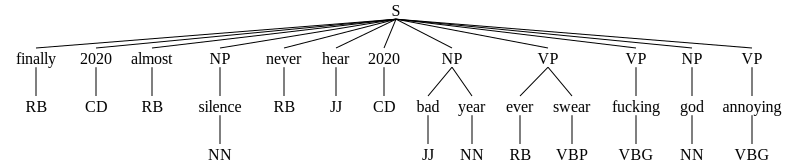

In [143]:
x = df["chunk_chink"][2]
x

In [144]:
#Concatenate words back together if noun phrase or verb phrase
def get_NP_VP_words(tree):
    words = []
    #only going down one level and checking label to see if NP or VP
    for subtree in tree: 
        if isinstance(subtree, Tree) and subtree.label() in ["NP", "VP"]:
            words.extend([word for word, pos in subtree.leaves()])
    return " ".join(words)
get_NP_VP_words(x)

'silence bad year ever swear fucking god annoying'

In [151]:
df["text_cleaned"] = df["chunk_chink"].apply(lambda x: get_NP_VP_words(x))
df.head(10)

,text,class,text_cleaned,len_text,len_text_cleaned,pos_tags,chunk_chink
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,722,"[(former, JJ), (wife, NN), (threatening, VBG),...","[[(former, JJ), (wife, NN)], [(threatening, VB..."
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliment coming someone k...,138,147,"[(weird, JJ), (get, NN), (affected, JJ), (comp...","[[(weird, JJ), (get, NN)], [(affected, JJ), (c..."
2,Finally 2020 is almost over... So I can never ...,non-suicide,silence bad year ever swear fucking god annoying,129,132,"[(finally, RB), (2020, CD), (almost, RB), (sil...","[(finally, RB), (2020, CD), (almost, RB), [(si..."
3,i need helpjust help me im crying so hard,suicide,need help help cry,41,45,"[(need, NN), (help, NN), (help, VB), (cry, VB)...","[[(need, NN)], [(help, NN)], [(help, VB)], [(c..."
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name struggling year ism past y...,2426,2421,"[(ism, NN), (lost, VBD), (hello, JJ), (name, N...","[[(ism, NN)], [(lost, VBD)], [(hello, JJ), (na..."
5,Honetly idkI dont know what im even doing here...,suicide,honestly id done know even feel nothing nowher...,1479,1484,"[(honestly, RB), (id, VBZ), (done, VBN), (know...","[[(honestly, RB), (id, VBZ)], [(done, VBN)], [..."
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse self inflicted burn ind...,1183,1208,"[(trigger, NN), (warning, VBG), (excuse, NN), ...","[[(trigger, NN)], [(warning, VBG)], [(excuse, ..."
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight,47,44,"[(end, NN), (tonight, NN), (anymore, RB), (qui...","[[(end, NN)], [(tonight, NN)], (anymore, RB), ..."
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone want edgy making conscious feel stand...,945,957,"[(everyone, NN), (want, VBP), (edgy, NN), (mak...","[[(everyone, NN)], [(want, VBP)], [(edgy, NN)]..."
9,My life is over at 20 years oldHello all. I am...,suicide,life year old hello year old balding male hair...,1116,1130,"[(life, NN), (20, CD), (year, NN), (old, JJ), ...","[[(life, NN)], (20, CD), [(year, NN)], [(old, ..."


In [149]:
df.to_csv("Cleaned Suicide Detection.csv")
df.to_pickle("Cleaned Suicide Detection.pkl")
